# Our Awesome Machine Learning Recycling Bot

In [40]:
# Imports
import matplotlib.pyplot as plt # math plotting library
%matplotlib inline 
import numpy as np
from os import listdir 
import random
from PIL import Image
import cv2  # openCV, computer vision library
from sklearn import svm  # our machine learning algorithm
from sklearn.metrics import accuracy_score  

In [41]:
# scale images down
scale_percent = 70 # percent of original size
for filename in listdir('recycling-data'):
    img_data = cv2.imread('recycling-data/' + filename, cv2.IMREAD_UNCHANGED)
    original_img_size = img_data.shape
    width = int(img_data.shape[1] * scale_percent / 100)
    height = int(img_data.shape[0] * scale_percent / 100)
    resize_img = (width, height)
    break
    

In [42]:
# Resize our images and turn them to grayscale
loaded_images = list()
original_images = list()

for filename in listdir('recycling-data'):
    if ( 'DS_Store' not in filename ):
        img_data = cv2.imread('recycling-data/' + filename, cv2.IMREAD_UNCHANGED)
        img_gray = cv2.cvtColor(img_data, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(img_gray, resize_img, interpolation = cv2.INTER_AREA)
    
        np_image = np.array(resized)
        np_image = np_image.reshape((resize_img[0]*resize_img[1], -1))
        np_image = np_image.flatten()
        loaded_images.append((np_image, filename))
          
loaded_images = np.array(loaded_images)

In [43]:
random.shuffle(loaded_images)

rec_types = ['cardboard', 'glass', 'trash', 'plastic', 'paper', 'metal']

def get_rec_type( filename ):
    for r in rec_types:
        if r in filename:
            return r

len_train_data = int(0.8* len(loaded_images))

x_train = np.array([ x for (x,y) in loaded_images[:len_train_data]])
x_test = np.array([ x for (x,y) in loaded_images[len_train_data:]])
           
y_test = np.array([ get_rec_type(y) for (x,y) in loaded_images[len_train_data:]])
y_train = np.array([ get_rec_type(y) for (x,y) in loaded_images[:len_train_data]])

In [44]:
print(len(x_train))
print(x_train[0].shape)
print(len(y_train))
print(y_train[0])

2021
(95944,)
2021
metal


337


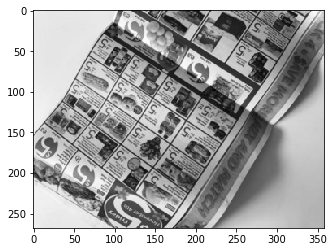

(268, 358)


In [45]:
# show image
rand_num = random.randint(1,len(x_test))
print(rand_num)
img = x_test[rand_num]
img = img.reshape(resize_img[::-1])
plt.imshow(img, cmap = 'gray')
plt.show()
print(img.shape)

In [46]:
# create classifier
classifier = svm.SVC(gamma=0.001, kernel='linear')
#fit to the training data
classifier.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
# create prediction data
pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)

In [48]:
# calculate accuracy
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)

print("accuracy on training data: " + str(acc_train))
print("accuracy on test data: " + str(acc_test))

accuracy on training data: 0.9990103908955963
accuracy on test data: 0.5968379446640316


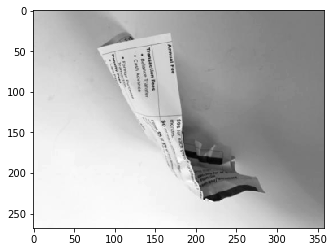

prediction is: paper


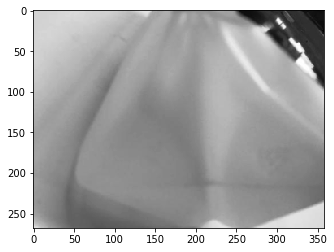

prediction is: plastic


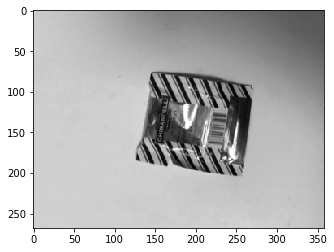

prediction is: plastic


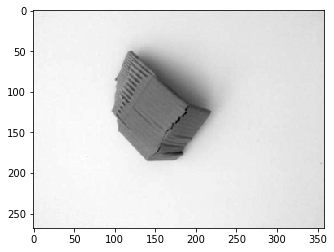

prediction is: cardboard


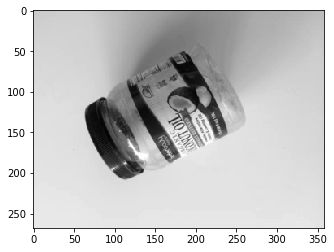

prediction is: plastic


In [49]:
for i in range(5):
    rand_num = random.randint(1,len(x_test))
    img = x_test[rand_num].reshape(resize_img[::-1])
    plt.imshow(img, cmap = 'gray')
    plt.show()
    print("prediction is: " + pred_test[rand_num])

original image shape: (384, 512)
img shape (1900, 1900)
 resized shape: (1900, 1900)
 desired shape: (384, 512)

crop shape (384, 512)
resized shape (268, 358)


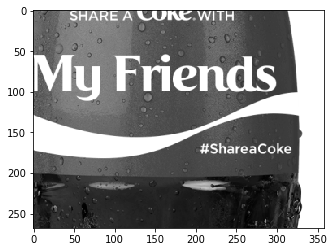

(1, 95944)
predicted recycling type: ['cardboard']


original image shape: (384, 512)
img shape (864, 1300)
 resized shape: (864, 1300)
 desired shape: (384, 512)

crop shape (384, 512)
resized shape (268, 358)


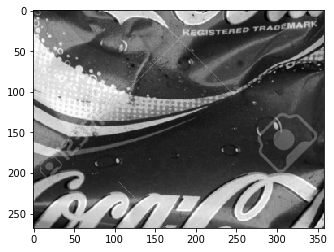

(1, 95944)
predicted recycling type: ['cardboard']


original image shape: (384, 512)
img shape (375, 500)
enlarge size 1: (512, 384)
 resized shape: (384, 512)
 desired shape: (384, 512)

crop shape (384, 512)
resized shape (268, 358)


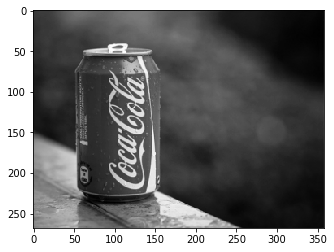

(1, 95944)
predicted recycling type: ['glass']




In [50]:
# testing
for filename in listdir('test-recycling'):
    test_img_data = cv2.imread('test-recycling/' + filename, cv2.IMREAD_UNCHANGED)
    test_img_gray = cv2.cvtColor(test_img_data, cv2.COLOR_BGR2GRAY)
    
#     resized = cv2.resize(img_gray, resize_img, interpolation = cv2.INTER_AREA)
    print("original image shape: "+ str(img_gray.shape))
    print("img shape " + str(test_img_gray.shape))
   
    # resize image if too small
    if(img_gray.shape[0] > test_img_gray.shape[0] or img_gray.shape[1] > test_img_gray.shape[1]) :
        
        scaled_width= (img_gray.shape[0])*int(test_img_gray.shape[1]/test_img_gray.shape[0])
        
        if ( scaled_width >= img_gray.shape[0]):
            
            
            enlarge_size = (img_gray.shape[1], scaled_width)
            print("enlarge size 1: "+ str(enlarge_size))
        else: 
            scaled_height= (img_gray.shape[1])*int(test_img_gray.shape[0]/test_img_gray.shape[1])
            enlarge_size = (scaled_height, img_gray.shape[0] )
            print("enlarge size 2: "+ str(enlarge_size))
            
        test_img_gray = cv2.resize(test_img_gray, enlarge_size, interpolation = cv2.INTER_AREA)
    
    
    print(" resized shape: " + str(test_img_gray.shape))
    print(" desired shape: " + str(img_gray.shape))
    
    # crop image
    h= img_gray.shape[0]
    w = img_gray.shape[1]
    print()
    y = int(test_img_gray.shape[0]/2) - int(h/2)
    x = int(test_img_gray.shape[1]/2) - int(w/2)
    
    crop = test_img_gray[y:y+h, x:x+w]
    print("crop shape " + str(crop.shape))
    
    
    test_resized = cv2.resize(crop, resize_img, interpolation = cv2.INTER_AREA)

    print("resized shape " + str(test_resized.shape))
    plt.imshow(test_resized, cmap = 'gray')
    plt.show()
    test_resized = test_resized.reshape(resize_img[0]*resize_img[1],-1)
    test_resized = test_resized.reshape(1, resize_img[0]*resize_img[1])
    print(test_resized.shape)
    
    pred_train = classifier.predict(np.array(test_resized))
    print("predicted recycling type: "+ str(pred_train) + "\n\n")
    
    
